In [696]:
import pandas as pd
import numpy as np

In [697]:
dengue_data = pd.read_csv("data/cleaned_dengue_merged.csv")
dengue_labels = pd.read_csv("data/dengue_labels_train.csv")
dengue_data

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,5,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,8,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,1,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,1,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [698]:
X_train = np.array(dengue_data)[:,:]
y_train = np.array(dengue_labels)[:,-1]
X_train, y_train

# Combine X_train and y_train for shuffling
combined = list(zip(X_train, y_train))
np.random.shuffle(combined)
X_train_shuffled, y_train_shuffled = zip(*combined)

# Convert back to arrays if needed
X_train = np.array(X_train_shuffled)
y_train = np.array(y_train_shuffled)
X_train

array([['sj', 2004, 38, ..., 32.2, 24.4, 32.8],
       ['sj', 2006, 25, ..., 33.3, 23.9, 25.5],
       ['sj', 1996, 43, ..., 33.9, 24.4, 6.6],
       ...,
       ['sj', 1997, 22, ..., 31.7, 22.8, 30.5],
       ['sj', 2005, 5, ..., 27.8, 19.4, 5.4],
       ['sj', 2005, 3, ..., 28.3, 21.7, 32.4]], dtype=object)

In [699]:
X_train[:,3], X_train[:,4], X_train[:,5], X_train[:,6]

(array([13, 6, 35, ..., 7, 8, 7], dtype=object),
 array(['2004-09-16', '2006-06-25', '1996-10-21', ..., '1997-05-28',
        '2005-02-05', '2005-01-22'], dtype=object),
 array([0.04015, 0.0255, -0.0969, ..., 0.0235, 0.0442, -0.1118333],
       dtype=object),
 array([0.1305525761047008, 0.04276667, -0.0902, ..., 0.05535, -0.0758,
        -0.07645], dtype=object))

In [700]:
X_train[:,0]

array(['sj', 'sj', 'sj', ..., 'sj', 'sj', 'sj'], dtype=object)

In [701]:
# this imrpves mae from 20 to 0 and accuracy from 0.13 to 0.99
from sklearn.preprocessing import OneHotEncoder

# Assuming 'labels' is a list or array containing the string labels 'sj' and 'iq'
labels = ['sj', 'iq']

# Create the OneHotEncoder object
encoder = OneHotEncoder()

# Fit the encoder to the labels and transform them
encoded_labels = encoder.fit_transform(X_train[:,0].reshape(-1,1))

# Convert the encoded labels to an array
encoded_labels_array = encoded_labels.toarray()

X_train = np.concatenate((encoded_labels_array, X_train[:,1:]), axis=1)

X_train[1,:],y_train[1]

(array([0.0, 1.0, 2006, 25, 6, '2006-06-25', 0.0255, 0.04276667, 0.1070429,
        0.1105571, 19.95, 300.478571429, 300.535714286, 296.642857143,
        302.4, 298.7, 39.52, 79.6957142857, 19.95, 18.0914285714,
        2.81428571429, 28.0714285714, 6.75714285714, 33.3, 23.9, 25.5],
       dtype=object),
 6)

In [702]:
def split_date(date_str):
    year, month, day = map(int, date_str.split('-'))
    return year, month, day

dates = X_train[:, 5]

print(dates)

if type(dates[0]) == str:
    years, months, days = zip(*map(split_date, dates))

    # Replace the date column with the split components
    X_train[:, 5] = months
    print(X_train[1,:])
    X_train = np.insert(X_train, 6, days, axis=1)

X_train = np.delete(X_train, 4, axis=1)

# Now convert the numerical columns to float
print(X_train[6,:],y_train[6])
X_train = X_train.astype(float)

['2004-09-16' '2006-06-25' '1996-10-21' ... '1997-05-28' '2005-02-05'
 '2005-01-22']
[0.0 1.0 2006 25 6 6 0.0255 0.04276667 0.1070429 0.1105571 19.95
 300.478571429 300.535714286 296.642857143 302.4 298.7 39.52 79.6957142857
 19.95 18.0914285714 2.81428571429 28.0714285714 6.75714285714 33.3 23.9
 25.5]
[0.0 1.0 2005 31 8 6 -0.06475 -0.0267 0.1404 0.1212 80.34 301.158571429
 301.107142857 297.291428571 303.0 299.3 54.1 79.6214285714 80.34
 18.8314285714 2.87142857143 28.9428571429 5.92857142857 33.3 25.0 41.0] 83


In [703]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))  # Reshape y_train before scaling

# Split the data into training and testing sets
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

X_train = np.delete(X_train_orig, 2, axis=1)
X_test = np.delete(X_test_orig, 2, axis=1)

# Print the shapes of training and testing data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train[:,:]


(1164, 25) (1164, 1)
(292, 25) (292, 1)


array([[  1. ,   0. ,  42. , ...,  36. ,  21. ,  45.2],
       [  0. ,   1. ,  32. , ...,  33.3,  23.3,  11.4],
       [  0. ,   1. ,  26. , ...,  32.8,  25. ,   7.2],
       ...,
       [  0. ,   1. ,   6. , ...,  31.7,  21.1,   0. ],
       [  0. ,   1. ,  21. , ...,  34.4,  23.3,  59.1],
       [  1. ,   0. ,  23. , ...,  32.8,  19.8, 203. ]])

In [704]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the number of features in your dataset
num_features = 25  # Adjust this based on your actual dataset

# Initialize the model
model = Sequential()

# Add input layer
model.add(Dense(64, activation='relu', input_shape=(num_features,)))

# Add hidden layers
model.add(Dense(64, activation='relu'))

# Add output layer
model.add(Dense(1, activation="relu"))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean Squared Error loss for regression task

# Print model summary
model.summary()


Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_215 (Dense)           (None, 64)                1664      
                                                                 
 dense_216 (Dense)           (None, 64)                4160      
                                                                 
 dense_217 (Dense)           (None, 1)                 65        
                                                                 
Total params: 5,889
Trainable params: 5,889
Non-trainable params: 0
_________________________________________________________________


In [705]:
print(X_train.shape, y_train.shape)
history = model.fit(X_train.astype(float), y_train.astype(float), epochs=1000, batch_size=32)

(1164, 25) (1164, 1)
Epoch 1/1000


37/37 [==============================] - 0s 602us/step - loss: 1390.1976 - mae: 20.2485
Epoch 2/1000
37/37 [==============================] - 0s 568us/step - loss: 1329.6174 - mae: 19.5928
Epoch 3/1000
37/37 [==============================] - 0s 532us/step - loss: 1302.8831 - mae: 19.8339
Epoch 4/1000
37/37 [==============================] - 0s 538us/step - loss: 1288.6917 - mae: 18.8866
Epoch 5/1000
37/37 [==============================] - 0s 644us/step - loss: 1283.8115 - mae: 18.4871
Epoch 6/1000
37/37 [==============================] - 0s 652us/step - loss: 1251.1239 - mae: 18.9563
Epoch 7/1000
37/37 [==============================] - 0s 565us/step - loss: 1239.2625 - mae: 19.2185
Epoch 8/1000
37/37 [==============================] - 0s 554us/step - loss: 1229.9926 - mae: 18.2497
Epoch 9/1000
37/37 [==============================] - 0s 550us/step - loss: 1192.8593 - mae: 18.0884
Epoch 10/1000
37/37 [==============================] - 0s 562us/step - loss: 1188.4375 - mae: 17.6375
Ep

In [706]:
prediction = model.predict(X_test.astype(float))
prediction[19], y_test[19]

10/10 [==============================] - 0s 1ms/step


(array([0.], dtype=float32), array([2]))

In [707]:
from sklearn.metrics import mean_absolute_error

# Assuming y_pred and y_test are the predicted and true values respectively
mae = mean_absolute_error(y_test, prediction)

print("Mean Absolute Error:", mae)

from sklearn.metrics import r2_score

# Assuming y_true and y_pred are the true and predicted target values, respectively
r2 = r2_score(y_test, prediction)

print("R-squared (R2) Score:", r2)



Mean Absolute Error: 27.93130475425557
R-squared (R2) Score: 0.17219726820325731


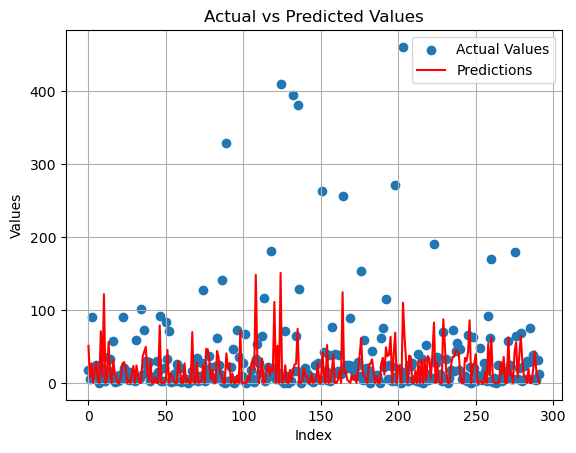

In [708]:
import matplotlib.pyplot as plt

# Assuming y_test contains actual values and predictions contains predicted values

# Scatter plot of actual values
plt.scatter(range(len(y_test)), y_test, label='Actual Values')

# Line plot of predicted values
plt.plot(range(len(prediction)), prediction, color='red', label='Predictions')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [709]:
# now to get weather characteristics from city year and week
weather_to_characteristics = np.array(dengue_labels)[:X_train.shape[0],:]
weather_to_characteristics

array([['sj', 1990, 18, 4],
       ['sj', 1990, 19, 5],
       ['sj', 1990, 20, 4],
       ...,
       ['iq', 2004, 44, 6],
       ['iq', 2004, 45, 22],
       ['iq', 2004, 46, 37]], dtype=object)

In [710]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'labels' is a list or array containing the string labels 'sj' and 'iq'
labels = ['sj', 'iq']

# Create the OneHotEncoder object
encoder = OneHotEncoder()

# Fit the encoder to the labels and transform them
encoded_labels = encoder.fit_transform(np.array(weather_to_characteristics[:,0]).reshape(-1, 1))

# Convert the encoded labels to an array
encoded_labels_array = encoded_labels.toarray()

print("Encoded labels:\n", encoded_labels_array)

Encoded labels:
 [[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [711]:
weather_to_characteristics = np.delete(weather_to_characteristics, 0, axis=1)
print(weather_to_characteristics)
weather_to_characteristics = np.concatenate((encoded_labels_array, weather_to_characteristics), axis=1)
weather_to_characteristics = np.delete(weather_to_characteristics, 4, axis=1)
weather_to_characteristics.shape

[[1990 18 4]
 [1990 19 5]
 [1990 20 4]
 ...
 [2004 44 6]
 [2004 45 22]
 [2004 46 37]]


(1164, 4)

In [712]:
weather_to_characteristics_y = y_train
weather_to_characteristics_y

array([[ 1],
       [23],
       [21],
       ...,
       [75],
       [48],
       [ 6]])

In [713]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the number of features in your dataset
num_features = 4  # Adjust this based on your actual dataset

# Initialize the model
model_1 = Sequential()


# Add input layer
model_1.add(Dense(64, activation='relu', input_shape=(num_features,)))

model_1.add(Dense(64, activation='relu'))

model_1.add(Dense(64, activation='relu'))


# Add hidden layers

# Add output layer
model_1.add(Dense(1, activation='linear'))

# Compile the model
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean Squared Error loss for regression task

# Print model summary
model_1.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_218 (Dense)           (None, 64)                320       
                                                                 
 dense_219 (Dense)           (None, 64)                4160      
                                                                 
 dense_220 (Dense)           (None, 64)                4160      
                                                                 
 dense_221 (Dense)           (None, 1)                 65        
                                                                 
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________


In [714]:
history = model_1.fit(weather_to_characteristics.astype(float), weather_to_characteristics_y.astype(float), epochs=1000, batch_size=32)

Epoch 1/1000
37/37 [==============================] - 0s 641us/step - loss: 1606.2257 - mae: 23.7930
Epoch 2/1000
37/37 [==============================] - 0s 565us/step - loss: 1422.6599 - mae: 20.4474
Epoch 3/1000
37/37 [==============================] - 0s 601us/step - loss: 1476.6940 - mae: 21.3480
Epoch 4/1000
37/37 [==============================] - 0s 570us/step - loss: 1420.1022 - mae: 20.9521
Epoch 5/1000
37/37 [==============================] - 0s 590us/step - loss: 1478.8842 - mae: 21.8842
Epoch 6/1000
37/37 [==============================] - 0s 583us/step - loss: 1436.3358 - mae: 21.2691
Epoch 7/1000
37/37 [==============================] - 0s 555us/step - loss: 1396.9836 - mae: 20.5280
Epoch 8/1000
37/37 [==============================] - 0s 581us/step - loss: 1640.3044 - mae: 23.9681
Epoch 9/1000
37/37 [==============================] - 0s 574us/step - loss: 1488.9790 - mae: 21.9046
Epoch 10/1000
37/37 [==============================] - 0s 581us/step - loss: 1427.8156 - ma

In [715]:
y_m1 = model_1.predict(weather_to_characteristics.astype(float))

37/37 [==============================] - 0s 451us/step


In [716]:
y=model_1.predict(weather_to_characteristics.astype(float))
from sklearn.metrics import mean_absolute_error

# Assuming y_pred and y_test are the predicted and true values respectively
mae = mean_absolute_error(y_m1, weather_to_characteristics_y)

print("Mean Absolute Error:", mae)

from sklearn.metrics import r2_score

# Assuming y_true and y_pred are the true and predicted target values, respectively
r2 = r2_score(y_m1, weather_to_characteristics_y)

print("R-squared (R2) Score:", r2)

print(y[130], weather_to_characteristics_y[130])

37/37 [==============================] - 0s 362us/step
Mean Absolute Error: 20.60774965384572
R-squared (R2) Score: -1065.1913079838405
[23.79705] [2]


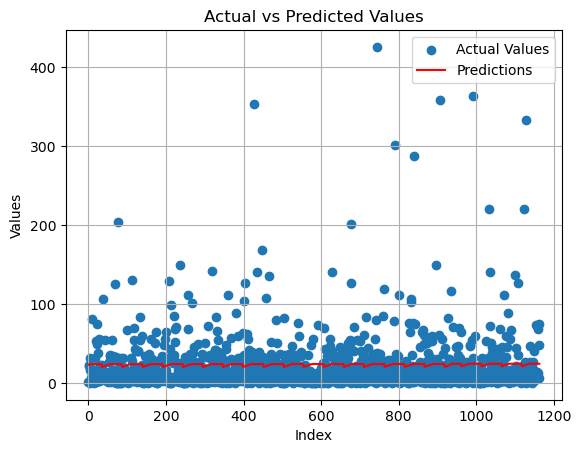

In [717]:
import matplotlib.pyplot as plt

# Assuming y_test contains actual values and predictions contains predicted values

# Scatter plot of actual values
plt.scatter(range(len(weather_to_characteristics_y)), weather_to_characteristics_y, label='Actual Values')

# Line plot of predicted values
plt.plot(range(len(y_m1)), y_m1, color='red', label='Predictions')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
